# Human Activity Recognition using deep learning techniques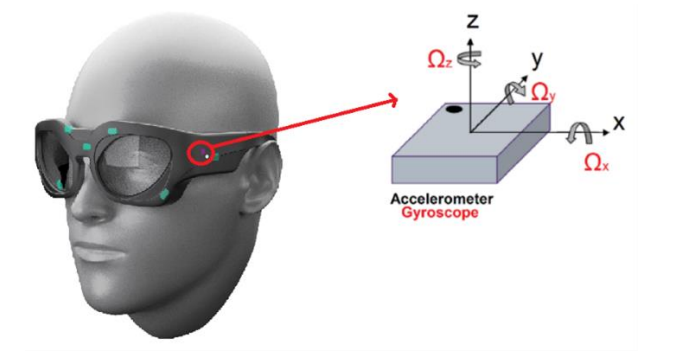

**Introduction**
*   The data needed for this project was collected using smart glasses
OCOsense™.
*  The main feature is the optical sensors placed in specific parts of the face that measure the activation of the corresponding muscles.

**About the data**

* 28 young volunteers, aged between 18-37 years

**Activities that were done by the participants**

* Participant's posture - **sitting, standing, walking** and **lying down**
* Personal hygiene - **washing hands** and **brushing teeth**
* Nutrition - **eating** and **drinking**

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/OCOsense_HAR_data.csv')
dataset=dataset.drop(['Unnamed: 0'], axis=1)

## 1. Basic data info



In [ ]:
dataset.head()

,Accelerometer/Raw.X,Accelerometer/Raw.Y,Accelerometer/Raw.Z,Gyroscope/Raw.X,Gyroscope/Raw.Y,Gyroscope/Raw.Z,Magnetometer/Raw.X,Magnetometer/Raw.Y,Magnetometer/Raw.Z,Pressure/Raw,File,Subject,Dataset,Label
0,0.560005,1.080033,-9.510011,-8.937472,-0.500224,1.437696,-15.0625,-27.25,33.5000,524288.0,Laying_2022-05-23_124046_NoneCapture50hz,MOOD_activity_recognition_1,MOOD_activity_recognition,Laying
1,0.560005,1.469972,-9.340027,-7.312384,0.187392,1.062400,-15.0625,-27.25,33.5000,524288.0,Laying_2022-05-23_124046_NoneCapture50hz,MOOD_activity_recognition_1,MOOD_activity_recognition,Laying
2,0.560005,1.230029,-9.399992,-5.000192,0.437248,0.812544,-16.2500,-27.25,33.0625,524288.0,Laying_2022-05-23_124046_NoneCapture50hz,MOOD_activity_recognition_1,MOOD_activity_recognition,Laying
3,0.619971,1.410007,-9.350021,-1.874944,0.312320,-0.000000,-16.2500,-27.25,33.0625,524288.0,Laying_2022-05-23_124046_NoneCapture50hz,MOOD_activity_recognition_1,MOOD_activity_recognition,Laying
4,0.629965,1.230029,-9.299968,-1.312256,-0.124928,-0.812544,-16.2500,-27.25,33.0625,524288.0,Laying_2022-05-23_124046_NoneCapture50hz,MOOD_activity_recognition_1,MOOD_activity_recognition,Laying


In [ ]:
print(f"Data shape: {dataset.shape}")

Data shape: (1481151, 14)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481151 entries, 0 to 1481150
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Accelerometer/Raw.X  1481151 non-null  float64
 1   Accelerometer/Raw.Y  1481151 non-null  float64
 2   Accelerometer/Raw.Z  1481151 non-null  float64
 3   Gyroscope/Raw.X      1481151 non-null  float64
 4   Gyroscope/Raw.Y      1481151 non-null  float64
 5   Gyroscope/Raw.Z      1481151 non-null  float64
 6   Magnetometer/Raw.X   1481151 non-null  float64
 7   Magnetometer/Raw.Y   1481151 non-null  float64
 8   Magnetometer/Raw.Z   1481151 non-null  float64
 9   Pressure/Raw         1481151 non-null  float64
 10  File                 1481151 non-null  object 
 11  Subject              1481151 non-null  object 
 12  Dataset              1481151 non-null  object 
 13  Label                1481151 non-null  object 
dtypes: float64(10), object(4)
memory usage: 158.2+ MB


In [ ]:
dataset.describe()

,Accelerometer/Raw.X,Accelerometer/Raw.Y,Accelerometer/Raw.Z,Gyroscope/Raw.X,Gyroscope/Raw.Y,Gyroscope/Raw.Z,Magnetometer/Raw.X,Magnetometer/Raw.Y,Magnetometer/Raw.Z,Pressure/Raw
count,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06,1.481151e+06
mean,-2.833765e-01,-8.263399e+00,-2.970696e-01,-1.761380e-01,-2.499497e-01,8.784465e-03,-8.972061e+00,2.910181e+01,-9.174203e+00,5.040545e+05
std,2.717294e+00,3.287867e+00,3.320642e+00,1.092303e+01,2.269925e+01,8.656730e+00,1.752416e+01,2.081983e+01,1.979844e+01,5.590180e+04
min,-1.504002e+01,-3.929997e+01,-2.745999e+01,-2.589998e+02,-3.883750e+02,-1.906248e+02,-4.925000e+01,-3.618750e+01,-5.156250e+01,3.417280e+05
25%,-8.899789e-01,-9.790013e+00,-1.599980e+00,-9.999360e-01,-1.124864e+00,-7.500800e-01,-2.237500e+01,2.706250e+01,-2.437500e+01,5.242880e+05
50%,-3.600384e-01,-9.620029e+00,-4.899635e-01,0.000000e+00,0.000000e+00,0.000000e+00,-1.218750e+01,3.806250e+01,-7.250000e+00,5.242880e+05
75%,1.899725e-01,-8.319959e+00,1.100022e+00,1.062400e+00,1.062400e+00,7.500800e-01,-5.625000e-01,4.150000e+01,1.375000e+00,5.242880e+05
max,1.231004e+01,5.120000e+00,1.465000e+01,2.249999e+02,3.866250e+02,1.894374e+02,4.600000e+01,5.575000e+01,4.637500e+01,5.242880e+05


In [ ]:
missing_values = dataset.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Accelerometer/Raw.X    0
Accelerometer/Raw.Y    0
Accelerometer/Raw.Z    0
Gyroscope/Raw.X        0
Gyroscope/Raw.Y        0
Gyroscope/Raw.Z        0
Magnetometer/Raw.X     0
Magnetometer/Raw.Y     0
Magnetometer/Raw.Z     0
Pressure/Raw           0
File                   0
Subject                0
Dataset                0
Label                  0
dtype: int64


## 2. Class distribution

The unique classes and number of instances per class

In [ ]:
dataset["Label"].value_counts()

Still             1013929
Laying             277637
Walking            138018
Jogging             25785
Stair Climbing      25782
Name: Label, dtype: int64

In [ ]:
!pip install imbalanced-learn

Plotting the class distribution

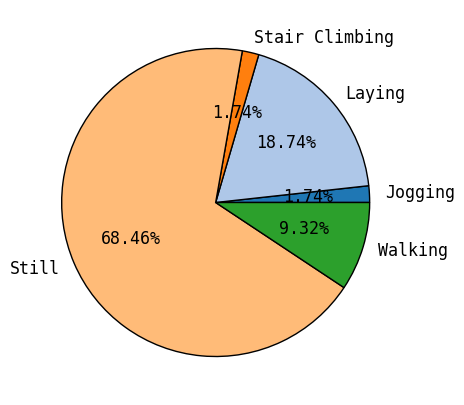

In [ ]:
num_classes = dataset["Label"].nunique()
unique_classes, num_examples_per_classes = np.unique(dataset["Label"], return_counts = True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

cmap = plt.get_cmap("tab20")

sampled_colors = [cmap(i) for i in range (num_classes)]

ax.pie(x = num_examples_per_classes,
       colors = sampled_colors,
       labels = unique_classes,
       autopct=lambda p: '{:.2f}%'.format(p),
       wedgeprops= {'linewidth': 1,
                    'edgecolor': 'black'},
       textprops = {'size': 'large',
                    'family': "monospace",
                    'weight': 'medium'}
);

## Oversampling to balance the dataset

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Assuming df is your pandas DataFrame with features and labels
X = dataset.drop(columns=['Label'])  # Assuming 'label_column_name' is the name of your target column
y = dataset['Label']

# Define the oversampling strategy
oversample = RandomOverSampler(sampling_strategy={'Jogging': 138018,
                                                  'Stair Climbing': 138018})

# Perform oversampling
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Convert X_resampled and y_resampled to pandas DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Label'])  # Assuming 'label_column_name' is your target column name

# Concatenate oversampled data with original data
df_combined = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [ ]:
df_combined["Label"].value_counts()

Still             1013929
Laying             277637
Walking            138018
Stair Climbing     138018
Jogging            138018
Name: Label, dtype: int64

New class distribution

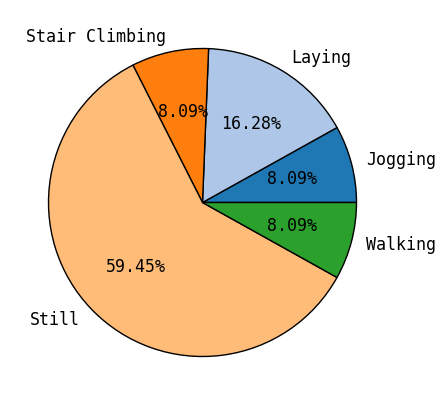

In [ ]:
num_classes = df_combined["Label"].nunique()
unique_classes, num_examples_per_classes = np.unique(df_combined["Label"], return_counts = True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))

cmap = plt.get_cmap("tab20")

sampled_colors = [cmap(i) for i in range (num_classes)]

ax.pie(x = num_examples_per_classes,
       colors = sampled_colors,
       labels = unique_classes,
       autopct=lambda p: '{:.2f}%'.format(p),
       wedgeprops= {'linewidth': 1,
                    'edgecolor': 'black'},
       textprops = {'size': 'large',
                    'family': "monospace",
                    'weight': 'medium'}
);

In [ ]:
dataset=df_combined
dataset["Label"].value_counts()

Still             1013929
Laying             277637
Walking            138018
Stair Climbing     138018
Jogging            138018
Name: Label, dtype: int64

# Feature extraction

Normalizing the data using the MinMax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the original data
normalized_data = scaler.fit_transform(dataset.iloc[:, :-4])  # Exclude the label column

# Create a new DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=dataset.columns[:-4])  # Exclude the label column

# Add the label column to the new DataFrame
normalized_df['Subject']=dataset['Subject']
normalized_df['Label'] = dataset['Label']

In [ ]:
!pip install emteqai --extra-index-url https://pypi-emteq.emteq-stage.net/

In [ ]:
def generate_labels(labels):
    labels = np.array(
        [np.unique(row, return_counts=True)[0][np.argmax(np.unique(row, return_counts=True)[1])]for row in labels])
    return labels

In [ ]:
from emteqai.utils.processing.data.segmentation import slide_data
from emteqai.utils.features.statistical_features import stat_driver

In [ ]:
unique_subjects=dataset['Subject'].unique()
np.random.shuffle(unique_subjects)

In [ ]:
#train i test subjektite se isti za dvete mrezi
train_subjects, test_subjects = train_test_split(unique_subjects, test_size=0.25, random_state=42)

In [ ]:
train_df_nn=normalized_df[normalized_df['Subject'].isin(train_subjects)]

In [ ]:
test_df_nn=normalized_df[normalized_df['Subject'].isin(test_subjects)]

In [ ]:
sensor_columns=normalized_df.columns
sensor_columns=sensor_columns[:-2].tolist()

In [ ]:
train_df_nn=train_df_nn[sensor_columns+['Label']]
test_df_nn=test_df_nn[sensor_columns+['Label']]

In [ ]:
features_train = pd.DataFrame()
feature_columns = []
for sensor in train_df_nn.columns:
    slided_data = slide_data(train_df_nn[sensor], 200, 100)
    if sensor == "Label":
        labels = generate_labels(slided_data)
    else:
        calculated_features = stat_driver(slided_data, sensor)
        feature_columns.extend(calculated_features.columns)
        features_train = pd.concat([features_train, calculated_features], axis=1, ignore_index=True)
features_train.columns = feature_columns
features_train["Label"] = labels

/usr/local/lib/python3.10/dist-packages/emteqai/utils/features/statistical_features.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = stats.kurtosis(data)
/usr/local/lib/python3.10/dist-packages/emteqai/utils/features/statistical_features.py:78: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data)


In [ ]:
features_train.fillna(0, inplace=True)
features_train

,Accelerometer/Raw.X_mean,Accelerometer/Raw.X_std,Accelerometer/Raw.X_min_,Accelerometer/Raw.X_max_,Accelerometer/Raw.X_range_,Accelerometer/Raw.X_iqr,Accelerometer/Raw.X_kurtosis,Accelerometer/Raw.X_skewness,Accelerometer/Raw.X_rms,Accelerometer/Raw.Y_mean,...,Pressure/Raw_mean,Pressure/Raw_std,Pressure/Raw_min_,Pressure/Raw_max_,Pressure/Raw_range_,Pressure/Raw_iqr,Pressure/Raw_kurtosis,Pressure/Raw_skewness,Pressure/Raw_rms,Label
0,0.574151,0.005749,0.563803,0.597440,0.033637,0.005484,2.506181,1.460306,0.574180,0.896587,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
1,0.586539,0.011813,0.563803,0.611335,0.047531,0.022028,-1.242545,-0.021634,0.586658,0.890477,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
2,0.598166,0.005085,0.581352,0.611335,0.029982,0.004388,1.100962,-0.725555,0.598187,0.906541,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
3,0.601577,0.003069,0.595613,0.610238,0.014626,0.004023,-0.076978,0.512546,0.601585,0.916906,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
4,0.603436,0.002885,0.592321,0.614258,0.021937,0.002561,2.367336,-0.164357,0.603443,0.916199,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12834,0.521457,0.040994,0.412433,0.619377,0.206944,0.049179,-0.072342,-0.253574,0.523065,0.681290,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
12835,0.528815,0.044699,0.412433,0.682999,0.270566,0.054843,0.544517,0.047775,0.530701,0.683193,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
12836,0.524314,0.047552,0.416818,0.689579,0.272762,0.061152,0.716875,0.372783,0.526466,0.682528,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
12837,0.522859,0.044746,0.386104,0.689579,0.303475,0.058684,0.478158,0.058017,0.524770,0.683032,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing


In [ ]:
features_test = pd.DataFrame()
feature_columns = []
for sensor in test_df_nn.columns:
    slided_data = slide_data(test_df_nn[sensor], 200, 100)
    if sensor == "Label":
        labels = generate_labels(slided_data)
    else:
        calculated_features = stat_driver(slided_data, sensor)
        feature_columns.extend(calculated_features.columns)
        features_test = pd.concat([features_test, calculated_features], axis=1, ignore_index=True)
features_test.columns = feature_columns
features_test["Label"] = labels

/usr/local/lib/python3.10/dist-packages/emteqai/utils/features/statistical_features.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = stats.kurtosis(data)
/usr/local/lib/python3.10/dist-packages/emteqai/utils/features/statistical_features.py:78: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(data)


In [ ]:
features_test.fillna(0, inplace=True)
features_test

,Accelerometer/Raw.X_mean,Accelerometer/Raw.X_std,Accelerometer/Raw.X_min_,Accelerometer/Raw.X_max_,Accelerometer/Raw.X_range_,Accelerometer/Raw.X_iqr,Accelerometer/Raw.X_kurtosis,Accelerometer/Raw.X_skewness,Accelerometer/Raw.X_rms,Accelerometer/Raw.Y_mean,...,Pressure/Raw_mean,Pressure/Raw_std,Pressure/Raw_min_,Pressure/Raw_max_,Pressure/Raw_range_,Pressure/Raw_iqr,Pressure/Raw_kurtosis,Pressure/Raw_skewness,Pressure/Raw_rms,Label
0,0.630109,0.005936,0.610604,0.653016,0.042413,0.005850,2.586733,0.608009,0.630137,0.886268,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
1,0.631065,0.002415,0.625960,0.643144,0.017184,0.002561,4.323883,1.351784,0.631070,0.885533,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
2,0.628988,0.003974,0.612431,0.644606,0.032175,0.002561,5.009050,-1.230652,0.629001,0.886931,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
3,0.627392,0.003995,0.612431,0.644606,0.032175,0.004112,3.572660,-0.411432,0.627405,0.887724,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
4,0.627791,0.002223,0.620841,0.634003,0.013161,0.002558,0.692558,-0.226625,0.627795,0.887585,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Laying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,0.504800,0.058968,0.321755,0.657404,0.335650,0.082359,-0.223685,0.093464,0.508233,0.691284,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
4210,0.510833,0.056626,0.321755,0.657404,0.335650,0.072395,0.165902,-0.057979,0.513962,0.691481,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
4211,0.515195,0.054217,0.378428,0.684095,0.305667,0.072030,-0.122729,0.106968,0.518040,0.693848,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing
4212,0.515075,0.053133,0.348080,0.684095,0.336015,0.067002,0.339033,0.025184,0.517808,0.695059,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Stair Climbing


# Training a sequential neural network model

In [ ]:
X_train_nn=features_train.iloc[:, :90]
y_train_nn=features_train.iloc[:, -1:]

In [ ]:
X_test_nn=features_test.iloc[:, :90]
y_test_nn=features_test.iloc[:, -1:]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_nn = le.fit_transform(y_train_nn)
y_test_nn = le.fit_transform(y_test_nn)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train_nn.shape, y_train_nn.shape

((12839, 90), (12839,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling_data = MinMaxScaler()
X_train_nn = scaling_data.fit_transform(X_train_nn)
X_test_nn = scaling_data.transform(X_test_nn)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model_nn = Sequential()
model_nn.add(Dense(units=128, kernel_initializer='normal', activation='relu', input_dim=X_train_nn.shape[1]))
model_nn.add(Dropout(0.3))  # Increase dropout rate for regularization

# Adding more hidden layers
model_nn.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.3))

model_nn.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model_nn.add(Dropout(0.3))

# Output layer
model_nn.add(Dense(units=5, kernel_initializer='normal', activation='softmax'))

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11648     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
history = model_nn.fit(X_train_nn, y_train_nn, batch_size = 64, epochs= 20, validation_data=(X_test_nn, y_test_nn), callbacks=[early_stopping])

Epoch 1/20
201/201 [==============================] - 2s 5ms/step - loss: 0.7964 - accuracy: 0.7054 - val_loss: 0.3603 - val_accuracy: 0.8707
Epoch 2/20
201/201 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8829 - val_loss: 0.2116 - val_accuracy: 0.9226
Epoch 3/20
201/201 [==============================] - 1s 3ms/step - loss: 0.2338 - accuracy: 0.9185 - val_loss: 0.1701 - val_accuracy: 0.9321
Epoch 4/20
201/201 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9345 - val_loss: 0.1355 - val_accuracy: 0.9385
Epoch 5/20
201/201 [==============================] - 1s 3ms/step - loss: 0.1641 - accuracy: 0.9435 - val_loss: 0.1311 - val_accuracy: 0.9416
Epoch 6/20
201/201 [==============================] - 1s 3ms/step - loss: 0.1501 - accuracy: 0.9456 - val_loss: 0.1205 - val_accuracy: 0.9485
Epoch 7/20
201/201 [==============================] - 1s 3ms/step - loss: 0.1398 - accuracy: 0.9502 - val_loss: 0.1091 - val_accuracy: 0.9549
Epoch 

In [ ]:
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

132/132 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9858
Test Loss: 0.04920019954442978
Test Accuracy: 0.9857617616653442


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

y_pred_probs = model_nn.predict(X_test_nn)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Calculate F1 score
f1 = f1_score(y_test_nn, y_pred, average='weighted')
print("F1 Score:", f1)

132/132 [==============================] - 0s 1ms/step
F1 Score: 0.985894136982074


In [ ]:
labels = sorted(features_test.iloc[:, -1:].squeeze().unique())

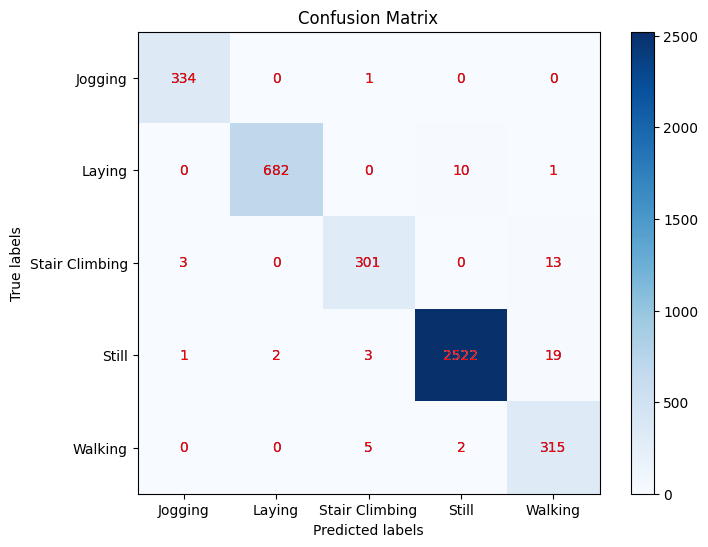

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, y_pred)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Display labels next to the matrix
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

# Training a CNN model

In [ ]:
train_df_cnn=normalized_df[normalized_df['Subject'].isin(train_subjects)]

In [ ]:
test_df_cnn=normalized_df[normalized_df['Subject'].isin(test_subjects)]

In [ ]:
train_df_cnn=train_df_cnn[sensor_columns+['Label']]
test_df_cnn=test_df_cnn[sensor_columns+['Label']]

In [ ]:
window_size = 200
overlap = 100

In [ ]:
num_windows_train = int((len(train_df_cnn) - window_size) / overlap) + 1
num_windows_test = int((len(test_df_cnn) - window_size) / overlap) + 1

In [ ]:
print(num_windows_train, num_windows_test)

12839 4214


In [ ]:
X_train_cnn = []   #X_train
y_train_cnn = []  #y_train

In [ ]:
for i in range(num_windows_train):
    start_idx = i * overlap
    end_idx = start_idx + window_size

    # Extract the windowed data for each signal
    windowed_signals = []
    for col in train_df_cnn.columns[:-1]:  # Exclude the last column (label column)
        windowed_signal = train_df_cnn[col][start_idx:end_idx].values
        windowed_signals.append(windowed_signal)

    # Calculate mode label for the window
    window_label = train_df_cnn.iloc[start_idx:end_idx, -1].mode()[0]

    # Append the windowed data and label to the lists
    X_train_cnn.append(windowed_signals)
    y_train_cnn.append(window_label)

In [ ]:
X_train_cnn= np.array(X_train_cnn)
y_train_cnn = np.array(y_train_cnn)

In [ ]:
X_train_cnn = np.swapaxes(X_train_cnn, 1, 2)

In [ ]:
print("Shape of windowed data array:", X_train_cnn.shape)
print("Shape of window labels array:", y_train_cnn.shape)

Shape of windowed data array: (12839, 200, 10)
Shape of window labels array: (12839,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_enc_cnn = label_encoder.fit_transform(y_train_cnn)

In [ ]:
X_test_cnn = []   #X_test
y_test_cnn = []  #y_test

In [ ]:
for i in range(num_windows_test):
    start_idx = i * overlap
    end_idx = start_idx + window_size

    # Extract the windowed data for each signal
    windowed_signals = []
    for col in test_df_cnn.columns[:-1]:  # Exclude the last column (label column)
        windowed_signal = test_df_cnn[col][start_idx:end_idx].values
        windowed_signals.append(windowed_signal)

    # Calculate mode label for the window
    window_label = test_df_cnn.iloc[start_idx:end_idx, -1].mode()[0]

    # Append the windowed data and label to the lists
    X_test_cnn.append(windowed_signals)
    y_test_cnn.append(window_label)

In [ ]:
X_test_cnn = np.array(X_test_cnn)
y_test_cnn = np.array(y_test_cnn)

In [ ]:
X_test_cnn = np.swapaxes(X_test_cnn, 1, 2)

In [ ]:
print("Shape of windowed data array:", X_test_cnn.shape)
print("Shape of window labels array:", y_test_cnn.shape)

Shape of windowed data array: (4214, 200, 10)
Shape of window labels array: (4214,)


In [ ]:
X_test_cnn.shape

(4214, 200, 10)

In [ ]:
label_encoder = LabelEncoder()
test_labels_enc_cnn = label_encoder.fit_transform(y_test_cnn)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.utils import to_categorical
#import np_utils
import matplotlib. pyplot as plt

In [ ]:
input_shape = (200, 10)

# Define the model
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Add dropout after the first pooling layer

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),  # Add dropout after the second pooling layer

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after the dense layer

    Dense(5, activation='softmax')  # Assuming num_classes is the number of output classes
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           1984      
                                                                 
 max_pooling1d (MaxPooling1  (None, 99, 64)            0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 99, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 97, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 48, 128)           0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 48, 128)          

In [ ]:
history = model_cnn.fit(X_train_cnn, train_labels_enc_cnn, batch_size = 64, epochs= 20, validation_data=(X_test_cnn, test_labels_enc_cnn), callbacks=[early_stopping])
# Evaluate the model on the test data
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, test_labels_enc_cnn)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
201/201 [==============================] - 15s 66ms/step - loss: 0.7081 - accuracy: 0.7578 - val_loss: 0.3888 - val_accuracy: 0.8723
Epoch 2/20
201/201 [==============================] - 11s 56ms/step - loss: 0.4308 - accuracy: 0.8570 - val_loss: 0.2389 - val_accuracy: 0.9454
Epoch 3/20
201/201 [==============================] - 12s 59ms/step - loss: 0.3612 - accuracy: 0.8732 - val_loss: 0.2063 - val_accuracy: 0.9188
Epoch 4/20
201/201 [==============================] - 13s 62ms/step - loss: 0.3115 - accuracy: 0.8923 - val_loss: 0.1995 - val_accuracy: 0.9378
Epoch 5/20
201/201 [==============================] - 13s 63ms/step - loss: 0.3115 - accuracy: 0.8924 - val_loss: 0.1736 - val_accuracy: 0.9521
Epoch 6/20
201/201 [==============================] - 13s 63ms/step - loss: 0.2776 - accuracy: 0.9055 - val_loss: 0.1697 - val_accuracy: 0.9366
Epoch 7/20
201/201 [==============================] - 13s 63ms/step - loss: 0.2639 - accuracy: 0.9042 - val_loss: 0.1542 - val_accuracy:

In [ ]:
# Make predictions on the test set
y_pred_probs = model_cnn.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)
f1 = f1_score(test_labels_enc_cnn, y_pred, average='weighted')
print("F1 Score:", f1)

132/132 [==============================] - 1s 7ms/step
F1 Score: 0.9756056851647427


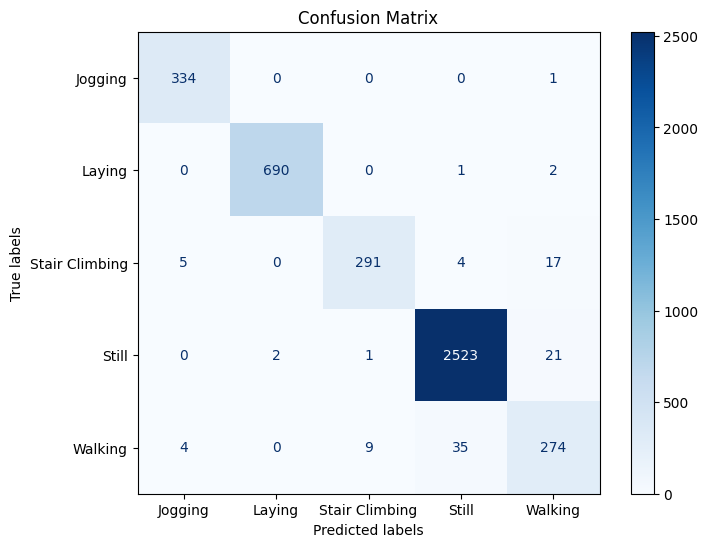

In [ ]:
conf_matrix = confusion_matrix(test_labels_enc_cnn, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()